### Churn Classification (Artificial Neural Network)

In [89]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [45]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Analysis Type

This Project will be concentrating on Deep Learning models like Aritficial Neural Network and Convulutional Neural Network
We will be creating a model to classify the churn type with provided information.

In [46]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df.drop(columns = 'customerID', inplace = True)

In [48]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Dataset Description

- Dataset has 12 features relating to chemical composition of wine like

  - Gender
  - SeniorCitizen
  - Partner
  - Dependents
  - Tenure
  - PhoneService
  - MultipleLines
  - InternetService
  - OnlineSecurity
  - OnlineBackup
  - DeviceProtection
  - TechSupport
  - StreamingTV
  - StreamingMovies
  - Contract
  - PaperlessBilling
  - PaymentMethod
  - MonthlyCharges
  - TotalCharges
  - Churn


  
Based on the above features we will predict whether customer is gonna churn or not

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


#### Data Cleaning

In [50]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors = 'coerce')
df.TotalCharges.isnull().sum()

11

In [51]:
df.dropna(inplace = True)

In [52]:
df.TotalCharges.isnull().sum()

0

In [53]:
df.shape

(7032, 20)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


#### Data Exploration and Feature Engineering

In [55]:
df.tenure.unique()[df.tenure.unique() > 10]

array([34, 45, 22, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71, 21, 12, 30, 47,
       72, 17, 27, 46, 11, 70, 63, 43, 15, 60, 18, 66, 31, 50, 64, 56, 42,
       35, 48, 29, 65, 38, 68, 32, 55, 37, 36, 41, 33, 67, 23, 57, 61, 14,
       20, 53, 40, 59, 24, 44, 19, 54, 51, 26, 39], dtype=int64)

In [56]:
df[df.tenure > 10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


<AxesSubplot:xlabel='tenure', ylabel='Count'>

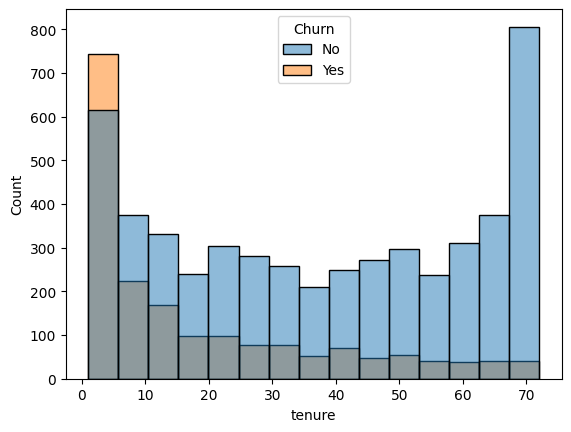

In [57]:
sns.histplot(data = df, x = df.tenure, hue = 'Churn')

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

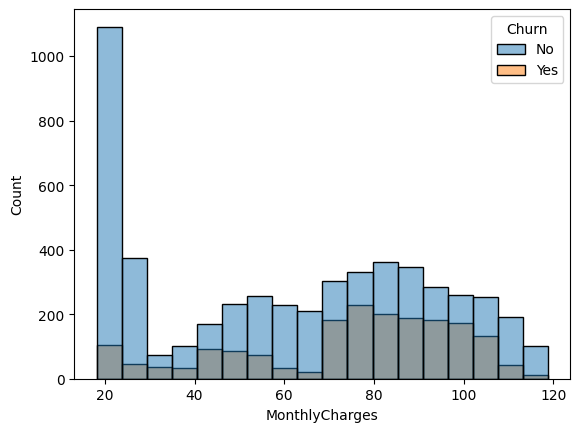

In [58]:
sns.histplot(data = df, x = df.MonthlyCharges, hue = 'Churn')

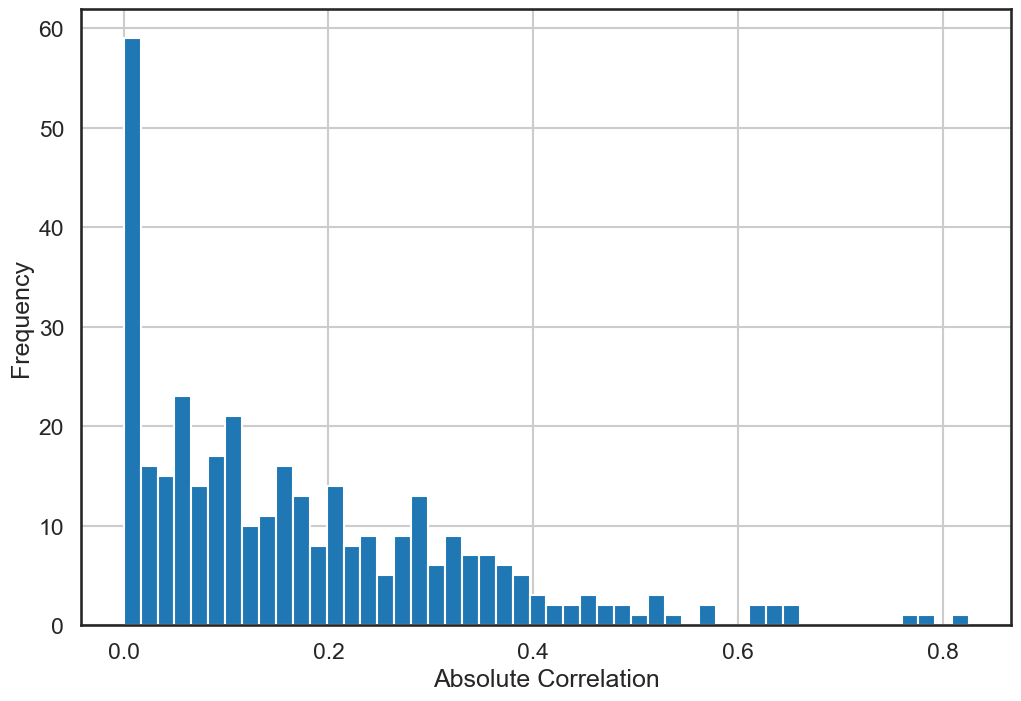

In [91]:
# Histogram representation of correlation
sns.set_context('talk')
sns.set_style('white')

ax = corr_values.abs_correlation.hist(bins=50, figsize=(12, 8))
ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

In [59]:
def cols_unique_values(df):
    for column in df:
        print(f'{column}: {df[column].unique()}')

In [60]:
cols_unique_values(df)

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:

In [61]:
df.replace('No internet service','No', inplace = True)
df.replace('No phone service','No', inplace = True)

In [62]:
cols_unique_values(df)

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: ['No' 'Yes']


In [63]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Churn','PaperlessBilling']
yes_no_columns

['Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Churn',
 'PaperlessBilling']

In [64]:
for cols in yes_no_columns:
    df[cols].replace('No',0, inplace = True)
    df[cols].replace('Yes',1, inplace = True)


In [65]:
cols_unique_values(df)

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [66]:
df.gender.replace({'Male':1, 'Female':0}, inplace = True)

In [67]:
cols_unique_values(df)

gender: [0 1]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [68]:
df = pd.get_dummies(df, columns = ['InternetService', 'Contract','PaymentMethod'])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [69]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [70]:
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6247,1,0,0,0,60,1,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
5296,0,0,0,0,57,0,0,1,0,1,...,1,0,0,0,1,0,0,1,0,0
4746,1,0,0,0,2,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
778,0,0,1,0,59,1,1,1,1,1,...,0,1,0,0,1,0,0,1,0,0
162,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


#### Preprocessing

In [71]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [72]:
df.TotalCharges

0       0.001275
1       0.215867
2       0.010310
3       0.210241
4       0.015330
          ...   
7038    0.227521
7039    0.847461
7040    0.037809
7041    0.033210
7042    0.787641
Name: TotalCharges, Length: 7032, dtype: float64

In [73]:
y = df['Churn']
x = df.drop(columns = 'Churn')

#### Model Building

In [74]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size= 0.8)

In [75]:
xtrain.shape

(5625, 26)

In [76]:
xtest.shape

(1407, 26)

In [77]:
import tensorflow as tf
from tensorflow import keras

1. ANN with minimum neurons

In [78]:
model = keras.Sequential([
    keras.layers.Dense(26, input_shape = (26,), activation = 'relu'),
    keras.layers.Dense(13, activation = 'relu'),
    keras.layers.Dense(6, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

In [79]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics='accuracy')

In [80]:
model.fit(xtrain, ytrain, epochs = 50)

Epoch 1/50
176/176 [==============================] - 1s 3ms/step - loss: 0.5494 - accuracy: 0.7236
Epoch 2/50
176/176 [==============================] - 0s 3ms/step - loss: 0.4300 - accuracy: 0.7906
Epoch 3/50
176/176 [==============================] - 0s 3ms/step - loss: 0.4215 - accuracy: 0.7989
Epoch 4/50
176/176 [==============================] - 1s 3ms/step - loss: 0.4175 - accuracy: 0.7989
Epoch 5/50
176/176 [==============================] - 1s 3ms/step - loss: 0.4161 - accuracy: 0.8004
Epoch 6/50
176/176 [==============================] - 0s 3ms/step - loss: 0.4140 - accuracy: 0.8036
Epoch 7/50
176/176 [==============================] - 1s 4ms/step - loss: 0.4127 - accuracy: 0.8036
Epoch 8/50
176/176 [==============================] - 1s 3ms/step - loss: 0.4123 - accuracy: 0.8057
Epoch 9/50
176/176 [==============================] - 1s 3ms/step - loss: 0.4094 - accuracy: 0.8073
Epoch 10/50
176/176 [==============================] - 1s 3ms/step - loss: 0.4071 - accuracy: 0.8069

In [101]:
ypred = model.predict(xtest)
model.evaluate(xtest, ytest)

44/44 [==============================] - 0s 4ms/step - loss: 0.6440 - accuracy: 0.7754


[0.6439998745918274, 0.7754086852073669]

In [83]:
from sklearn.metrics import confusion_matrix, classification_report

In [84]:
ytest[:10]

4501    0
1559    0
6524    1
3755    1
3754    0
1813    0
66      0
698     0
138     0
3991    1
Name: Churn, dtype: int64

In [85]:
ypred[:10]

array([[0.00716145],
       [0.24886923],
       [0.6053888 ],
       [0.6934113 ],
       [0.25303948],
       [0.60831803],
       [0.24445324],
       [0.08245731],
       [0.00263437],
       [0.7116759 ]], dtype=float32)

In [86]:
yt = []
for i in ypred:
    if i > 0.5:
        yt.append(1)
    else:
        yt.append(0)

In [87]:
print(classification_report(yt, ytest))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      1044
           1       0.61      0.62      0.61       363

    accuracy                           0.80      1407
   macro avg       0.74      0.74      0.74      1407
weighted avg       0.80      0.80      0.80      1407



2. ANN with more layers, neurons and leaky_relu activation function

In [96]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape = (26,), activation = 'leaky_relu'),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(30, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics='accuracy')
model.fit(xtrain, ytrain, epochs = 50)

Epoch 1/50
176/176 [==============================] - 2s 5ms/step - loss: 0.4542 - accuracy: 0.7842
Epoch 2/50
176/176 [==============================] - 1s 4ms/step - loss: 0.4172 - accuracy: 0.8020
Epoch 3/50
176/176 [==============================] - 1s 4ms/step - loss: 0.4133 - accuracy: 0.8005
Epoch 4/50
176/176 [==============================] - 1s 4ms/step - loss: 0.4101 - accuracy: 0.8052
Epoch 5/50
176/176 [==============================] - 1s 4ms/step - loss: 0.4059 - accuracy: 0.8092
Epoch 6/50
176/176 [==============================] - 1s 5ms/step - loss: 0.4029 - accuracy: 0.8117
Epoch 7/50
176/176 [==============================] - 1s 4ms/step - loss: 0.4013 - accuracy: 0.8105
Epoch 8/50
176/176 [==============================] - 1s 5ms/step - loss: 0.3980 - accuracy: 0.8105
Epoch 9/50
176/176 [==============================] - 1s 5ms/step - loss: 0.3956 - accuracy: 0.8123
Epoch 10/50
176/176 [==============================] - 1s 5ms/step - loss: 0.3938 - accuracy: 0.8164

In [102]:
ypred = model.predict(xtest)
model.evaluate(xtest, ytest)

44/44 [==============================] - 0s 3ms/step - loss: 0.6440 - accuracy: 0.7754


[0.6439998745918274, 0.7754086852073669]

In [99]:
yt = []
for i in ypred:
    if i > 0.5:
        yt.append(1)
    else:
        yt.append(0)

In [100]:
print(classification_report(yt, ytest))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1042
           1       0.57      0.58      0.57       365

    accuracy                           0.78      1407
   macro avg       0.71      0.71      0.71      1407
weighted avg       0.78      0.78      0.78      1407



3. ANN with Dropout Layers and relu activation function

In [107]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape = (26,), activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(30, activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation = 'sigmoid')
])
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics='accuracy')
model.fit(xtrain, ytrain, epochs = 50)

Epoch 1/50
176/176 [==============================] - 3s 6ms/step - loss: 0.5560 - accuracy: 0.7170
Epoch 2/50
176/176 [==============================] - 1s 6ms/step - loss: 0.4807 - accuracy: 0.7621
Epoch 3/50
176/176 [==============================] - 1s 5ms/step - loss: 0.4631 - accuracy: 0.7703
Epoch 4/50
176/176 [==============================] - 1s 6ms/step - loss: 0.4566 - accuracy: 0.7767
Epoch 5/50
176/176 [==============================] - 1s 6ms/step - loss: 0.4437 - accuracy: 0.7788
Epoch 6/50
176/176 [==============================] - 1s 6ms/step - loss: 0.4453 - accuracy: 0.7884
Epoch 7/50
176/176 [==============================] - 1s 6ms/step - loss: 0.4428 - accuracy: 0.7895
Epoch 8/50
176/176 [==============================] - 1s 6ms/step - loss: 0.4436 - accuracy: 0.7884
Epoch 9/50
176/176 [==============================] - 1s 6ms/step - loss: 0.4383 - accuracy: 0.7973
Epoch 10/50
176/176 [==============================] - 1s 5ms/step - loss: 0.4335 - accuracy: 0.7911

In [108]:
ypred = model.predict(xtest)
model.evaluate(xtest, ytest)

44/44 [==============================] - 0s 3ms/step - loss: 0.4526 - accuracy: 0.7932


[0.4525923430919647, 0.7931769490242004]

In [109]:
yt = []
for i in ypred:
    if i > 0.5:
        yt.append(1)
    else:
        yt.append(0)

In [110]:
print(classification_report(yt, ytest))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1031
           1       0.61      0.61      0.61       376

    accuracy                           0.79      1407
   macro avg       0.74      0.73      0.73      1407
weighted avg       0.79      0.79      0.79      1407



#### Best Model

According to my dataset ANN with hidden layers having 'relu' activation function, last layer with 'sigmoid' with inbetween dropout layers perfoms well compared to other models 

#### Model Findings and Insights

My best model has the fair precision, recall and f1-score with accuracy of 79